In [5]:
#18/12/2021
from ts2vg import NaturalVG
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("C:/Users/cfzap/Downloads/archive/Sunspots.csv")
#Numero de manchas solares registradas por mes desde 1749/01/31 hasta 2021/01/31
#Tomado de: https://www.kaggle.com/robervalt/sunspots


In [17]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [8]:
s=df["Monthly Mean Total Sunspot Number"]
s

0        96.7
1       104.3
2       116.7
3        92.8
4       141.7
        ...  
3260      0.6
3261     14.4
3262     34.0
3263     21.8
3264     10.4
Name: Monthly Mean Total Sunspot Number, Length: 3265, dtype: float64

In [9]:
a=df.loc[:, "Monthly Mean Total Sunspot Number"]
b=a.values
b

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

Text(0.5, 1.0, 'Visibility Graph')

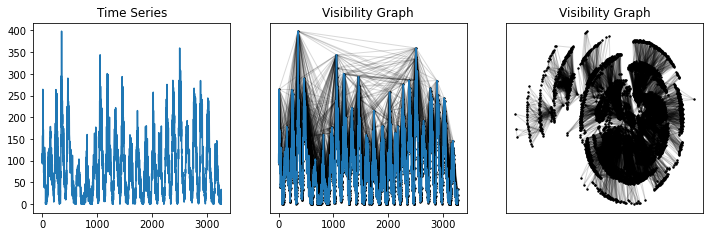

In [10]:
#GRAOS DE VISIBILIDAD

ts = b

# Grafo
g = NaturalVG(directed=None).build(ts)
nxg = g.as_networkx()

# graficos
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(ts)
ax0.set_title('Time Series')

graph_plot_options = {
    'with_labels': False,
    'node_size': 2,
    'node_color': [(0, 0, 0, 1)],
    'edge_color': [(0, 0, 0, 0.15)],
}

nx.draw_networkx(nxg, ax=ax1, pos=g.node_positions(), **graph_plot_options)
ax1.tick_params(bottom=True, labelbottom=True)
ax1.plot(ts)
ax1.set_title('Visibility Graph')

nx.draw_networkx(nxg, ax=ax2, pos=nx.kamada_kawai_layout(nxg), **graph_plot_options)
ax2.set_title('Visibility Graph')

Text(0, 0.5, 'P(k)')

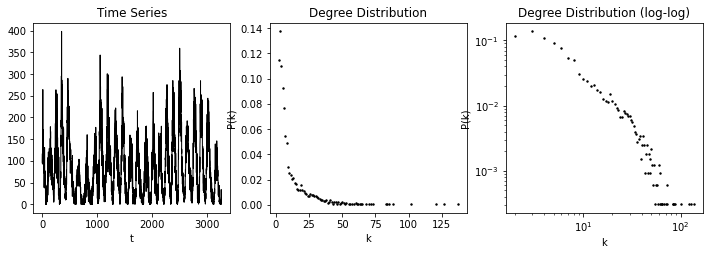

In [12]:
#DISTRIBUCIÓN DE GRADO

ts = b

# Grafo
g = NaturalVG().build(ts, only_degrees=True)

# Distribución de grado 
ks, ps = g.degree_distribution

# Graficos
fig, [ax0, ax1, ax2] = plt.subplots(ncols=3, figsize=(12, 3.5))

ax0.plot(ts, c='#000', linewidth=1)
ax0.set_title('Time Series')
ax0.set_xlabel('t')

ax1.scatter(ks, ps, s=2, c='#000', alpha=1)
ax1.set_title('Degree Distribution')
ax1.set_xlabel('k')
ax1.set_ylabel('P(k)')

ax2.scatter(ks, ps, s=2, c='#000', alpha=1)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title('Degree Distribution (log-log)')
ax2.set_xlabel('k')
ax2.set_ylabel('P(k)')

In [14]:
#MATRIZ DE ADYACENCIA 

g = NaturalVG().build(ts)

g.adjacency_matrix(triangle='lower')

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)